In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#read data
data_df = pd.read_csv('movieReplicationSet.csv')

In [3]:
#display dataframe
display(data_df)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


# 9 

In [4]:
#get Home Alone (1990) & Finding Nemo (2003) data
M1 = pd.to_numeric(data_df['Home Alone (1990)'],errors='coerce').values
M2 = pd.to_numeric(data_df['Finding Nemo (2003)'],errors='coerce').values

In [5]:
#row-wise removal of Nan values - so we don't only capture die-hard fans of the movies (want ppl who saw both)
list_tuples = list(zip(M1, M2))

M1M2_df = pd.DataFrame(list_tuples)

M1M2 = M1M2_df.dropna()

In [7]:
#check length to see how many data were lost
len(M1M2)

810

In [8]:
#split data back into 2 vectors
M1 = M1M2[0]
M2 = M1M2[1]

In [9]:
#KS test
stats.kstest(M1, M2)

KstestResult(statistic=0.16790123456790124, pvalue=2.2038507937682687e-10, statistic_location=3.0, statistic_sign=1)

p-val is less than 0.005 therefore, we CAN conclude that there is a significant difference in the ratings distributions of Home Alone and Finding Nemo

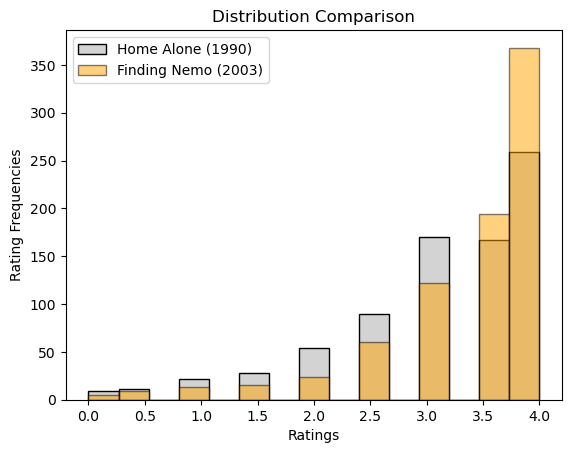

In [23]:
plt.hist(M1, color='lightgrey', ec='black', bins=15, label='Home Alone (1990)', alpha=1)
plt.hist(M2, color='orange', ec='black', bins=15, label='Finding Nemo (2003)', alpha=0.5)
plt.title('Distribution Comparison')
plt.xlabel('Ratings')
plt.ylabel('Rating Frequencies')
plt.legend()

In [24]:
data_df["I enjoy driving fast"].unique()

array([ 5.,  4.,  1.,  3.,  2., nan])

# 10

want to compare all movies in a given franchise to see if there is inconsistency within the franchise - ANOVA? compare means of ratings?

### Franchise 1 - Star Wars

In [46]:
#get data
starwars_df = data_df.filter(regex='Star Wars')
starwars_df = starwars_df.apply(pd.to_numeric, errors='coerce')

In [54]:
#row-wise removal of NaN
starwars_clean = starwars_df.dropna().reset_index(drop=True)

In [55]:
len(starwars_clean)

333

In [59]:
#ANOVA
stats.f_oneway(starwars_clean['Star Wars: Episode IV - A New Hope (1977)'], starwars_clean['Star Wars: Episode II - Attack of the Clones (2002)'], starwars_clean['Star Wars: Episode V - The Empire Strikes Back (1980)'], starwars_clean['Star Wars: Episode 1 - The Phantom Menace (1999)'], starwars_clean['Star Wars: Episode VII - The Force Awakens (2015)'], starwars_clean['Star Wars: Episode VI - The Return of the Jedi (1983)'])

F_onewayResult(statistic=39.029939613074056, pvalue=2.399595163532992e-38)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Star Wars franchise --> INCONSISTENCY

### Franchise 2 - Harry Potter

In [62]:
#get data
harrypotter_df = data_df.filter(regex='Harry Potter')
harrypotter_df = harrypotter_df.apply(pd.to_numeric, errors='coerce')

In [64]:
#row-wise removal of NaN
harrypotter_clean = harrypotter_df.dropna().reset_index(drop=True)

In [65]:
len(harrypotter_clean)

710

In [67]:
#ANOVA
stats.f_oneway(harrypotter_clean["Harry Potter and the Sorcerer's Stone (2001)"], harrypotter_clean["Harry Potter and the Deathly Hallows: Part 2 (2011)"], harrypotter_clean["Harry Potter and the Goblet of Fire (2005)"], harrypotter_clean["Harry Potter and the Chamber of Secrets (2002)"])

F_onewayResult(statistic=1.4456904473285563, pvalue=0.2275340290918136)

p-val is greater than 0.005, so we CANNOT conclude that there is a significant difference in the mean ratings of the movies in the Harry Potter franchise --> LACK OF INCONSISTENCY

### Franchise 3 - The Matrix

In [93]:
#get data
matrix_df = data_df.filter(regex='Matrix')
matrix_df = matrix_df.apply(pd.to_numeric, errors='coerce')

In [94]:
#row-wise removal of NaN
matrix_clean = matrix_df.dropna().reset_index(drop=True)

In [95]:
len(matrix_clean)

260

In [97]:
#ANOVA
stats.f_oneway(matrix_clean["The Matrix Revolutions (2003)"], matrix_clean["The Matrix Reloaded (2003)"], matrix_clean["The Matrix (1999)"])

F_onewayResult(statistic=18.59281511303809, pvalue=1.2957225925356723e-08)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Matrix franchise --> INCONSISTENCY

### Franchise 4 - Indiana Jones

In [68]:
#get data
indianajones_df = data_df.filter(regex='Indiana Jones')
indianajones_df = indianajones_df.apply(pd.to_numeric, errors='coerce')

In [70]:
#row-wise removal of NaN
indianajones_clean = indianajones_df.dropna().reset_index(drop=True)

In [71]:
len(indianajones_clean)

244

In [72]:
#ANOVA
stats.f_oneway(indianajones_clean["Indiana Jones and the Last Crusade (1989)"], indianajones_clean["Indiana Jones and the Temple of Doom (1984)"], indianajones_clean["Indiana Jones and the Raiders of the Lost Ark (1981)"], indianajones_clean["Indiana Jones and the Kingdom of the Crystal Skull (2008)"])

F_onewayResult(statistic=19.050958699528884, pvalue=5.20425425762115e-12)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Indiana Jones franchise --> INCONSISTENCY

### Franchise 5 - Jurassic Park

In [73]:
#get data
jurassicpark_df = data_df.filter(regex='Jurassic Park')
jurassicpark_df = jurassicpark_df.apply(pd.to_numeric, errors='coerce')

In [75]:
#row-wise removal of NaN
jurassicpark_clean = jurassicpark_df.dropna().reset_index(drop=True)

In [76]:
len(jurassicpark_clean)

398

In [77]:
#ANOVA
stats.f_oneway(jurassicpark_clean["The Lost World: Jurassic Park (1997)"], jurassicpark_clean["Jurassic Park III (2001)"], jurassicpark_clean["Jurassic Park (1993)"])

F_onewayResult(statistic=22.163615231952207, pvalue=3.542127514286409e-10)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Jurassic Park franchise --> INCONSISTENCY

### Franchise 6 - Pirates of the Caribbean

In [78]:
#get data
pirates_df = data_df.filter(regex='Pirates of the Caribbean')
pirates_df = pirates_df.apply(pd.to_numeric, errors='coerce')

In [80]:
#row-wise removal of NaN
pirates_clean = pirates_df.dropna().reset_index(drop=True)

In [81]:
len(pirates_clean)

561

In [82]:
#ANOVA
stats.f_oneway(pirates_clean["Pirates of the Caribbean: Dead Man's Chest (2006)"], pirates_clean["Pirates of the Caribbean: At World's End (2007)"], pirates_clean["Pirates of the Caribbean: The Curse of the Black Pearl (2003)"])

F_onewayResult(statistic=3.4465950041304323, pvalue=0.03207932803269902)

p-val is greater than 0.005, so we CANNOT conclude that there is a significant difference in the mean ratings of the movies in the Pirates of the Caribbean franchise --> LACK OF INCONSISTENCY

### Franchise 7 - Toy Story

In [83]:
#get data
toystory_df = data_df.filter(regex='Toy Story')
toystory_df = toystory_df.apply(pd.to_numeric, errors='coerce')

In [85]:
#row-wise removal of NaN
toystory_clean = toystory_df.dropna().reset_index(drop=True)

In [86]:
len(toystory_clean)

757

In [87]:
#ANOVA
stats.f_oneway(toystory_clean["Toy Story 2 (1999)"], toystory_clean["Toy Story 3 (2010)"], toystory_clean["Toy Story (1995)"])

F_onewayResult(statistic=7.5881445425788305, pvalue=0.0005193828629536134)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Toy Story franchise --> INCONSISTENCY

### Franchise 8 - Batman

In [88]:
#get data
batman_df = data_df.filter(regex='Batman')
batman_df = batman_df.apply(pd.to_numeric, errors='coerce')

In [90]:
#row-wise removal of NaN
batman_clean = batman_df.dropna().reset_index(drop=True)

In [91]:
len(batman_clean)

219

In [92]:
#ANOVA
stats.f_oneway(batman_clean["Batman & Robin (1997)"], batman_clean["Batman (1989)"], batman_clean["Batman: The Dark Knight (2008)"])

F_onewayResult(statistic=43.62587891516757, pvalue=1.6410731510652519e-18)

p-val is less than 0.005, so we CAN conclude that there is a significant difference in the mean ratings of the movies in the Batman franchise --> INCONSISTENCY

# Extra credit

Idea 1: do ppl who like driving fast like the fast and furious movie more than the ppl who don't like driving fast?

In [3]:
#get data
fast_movie = pd.to_numeric(data_df['The Fast and the Furious (2001)'],errors='coerce').values
fast_driver = pd.to_numeric(data_df['I enjoy driving fast'],errors='coerce').values

In [4]:
#row-wise removal of Nan values
list_tuples_fast = list(zip(fast_movie, fast_driver))

fast_df = pd.DataFrame(list_tuples_fast)

fast = fast_df.dropna()

In [5]:
#split at 3, assuming 3 is neutral --> 1-2 is low/disagree, 4-5 is high/agree
fast_low = fast[fast[1]<3]
fast_high = fast[fast[1]>3]

In [28]:
len(fast_high)

339

In [6]:
#KS test
stats.kstest(fast_low[0], fast_high[0])

KstestResult(statistic=0.06736302529135839, pvalue=0.7789121449805628, statistic_location=2.5, statistic_sign=1)

In [7]:
#Mann Whitney test
stats.mannwhitneyu(fast_low[0], fast_high[0])

MannwhitneyuResult(statistic=18901.0, pvalue=0.15426934747495427)

In [29]:
#independent samples t-test
stats.ttest_ind(fast_low[0], fast_high[0])

Ttest_indResult(statistic=-1.5141650621730134, pvalue=0.1306722496790127)

In [33]:
fast_low[0].mean()

2.4754098360655736

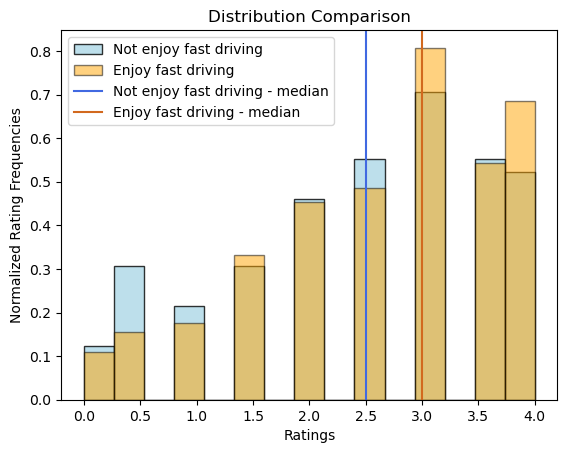

In [9]:
plt.hist(fast_low[0], color='lightblue', ec='black', bins=15, label='Not enjoy fast driving', alpha=0.8, density=True)
plt.hist(fast_high[0], color='orange', ec='black', bins=15, label='Enjoy fast driving', alpha=0.5, density=True)
plt.axvline(x=fast_low[0].median(), color='royalblue', label='Not enjoy fast driving - median')
plt.axvline(x=fast_high[0].median(), color='chocolate', label='Enjoy fast driving - median')
plt.title('Distribution Comparison')
plt.xlabel('Ratings')
plt.ylabel('Normalized Rating Frequencies')
plt.legend()

Idea 2: do ppl who have a more active imagination rate movies differently than ppl who don't have a more active imagination? OR what proportion of movies are rated differently by viewers with more active imagination than ppl who don't have an active imagination

In [117]:
total_movies = 400 #from spec sheet

In [124]:
significant_count = 0

for i in range(total_movies):
    movie = pd.to_numeric(data_df.iloc[:,i],errors='coerce').values
    viewer = pd.to_numeric(data_df['Has an active imagination'],errors='coerce').values
    
    list_tuples_all = list(zip(movie, viewer))
    movie_viewer_df = pd.DataFrame(list_tuples_all)
    movie_viewer = movie_viewer_df.dropna()
    
    imagination_low = movie_viewer[movie_viewer[1]<3]
    imagination_high = movie_viewer[movie_viewer[1]>3]
    
    t_stat, p_val = stats.ttest_ind(imagination_low[0], imagination_high[0])
    
    if p_val < 0.005:
        significant_count += 1
    else:
        continue

In [126]:
print(significant_count/total_movies)
print(significant_count)

0.02
8


In [ ]:
#split at 3, assuming 3 is neutral